This script contains thalweg plots for Puget sound for a thalweg drawn through adrimarlty inlet to Main basin. These thalweg plots show how several model variables change along the thalwegs such as salinity and temperature.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from salishsea_tools import viz_tools, places, visualisations
import netCDF4 as nc # unless you prefer xarray
import datetime as dt
import os
import glob
import cmocean

%matplotlib inline
#Try changing things, try looking at the model output, and try comparing output from different times.
#In the 2018 files you have the years 2015-2018
#There is this star thing that people use in terminal (*) That is useful for finding files and you should try and find that.

### Thalweg plot
  method using contour_thalweg from visualisations.py in tools repo

In [29]:
#open bathy file and meshmask
f=nc.Dataset('/results/SalishSea/nowcast-green.201812/01apr16/SalishSea_1h_20160401_20160401_ptrc_T.nc')
g=nc.Dataset('/results/SalishSea/nowcast-green.201812/01apr16/SalishSea_1h_20160401_20160401_grid_T.nc')
fbathy=nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/bathymetry_201702.nc')
fmesh=nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
il=5

In [35]:
g

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    name: SalishSea_1h_20160401_20160410
    description: ocean T grid variables
    title: ocean T grid variables
    Conventions: CF-1.6
    timeStamp: 2019-Jan-06 02:40:23 GMT
    uuid: 5e119ede-ac2e-4fc6-8bb1-a1f786f93a44
    dimensions(sizes): axis_nbounds(2), x(398), y(898), nvertex(4), deptht(40), time_counter(24)
    variables(dimensions): float32 nav_lat(y, x), float32 nav_lon(y, x), float32 bounds_lon(y, x, nvertex), float32 bounds_lat(y, x, nvertex), float32 area(y, x), float32 deptht(deptht), float32 deptht_bounds(deptht, axis_nbounds), float32 sossheig(time_counter, y, x), float64 time_centered(time_counter), float64 time_centered_bounds(time_counter, axis_nbounds), float64 time_counter(time_counter), float64 time_counter_bounds(time_counter, axis_nbounds), float32 votemper(time_counter, deptht, y, x), float32 vosaline(time_counter, deptht, y, x)
    groups: 

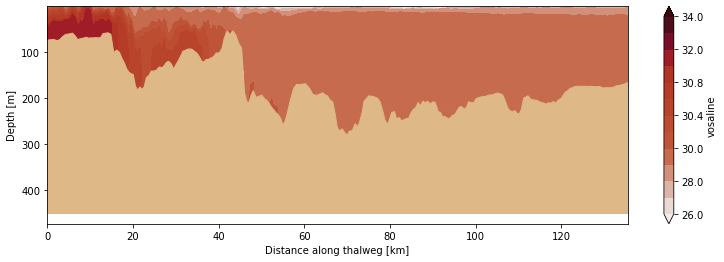

In [38]:
fig,ax=plt.subplots(1,1,figsize=(13,4))
modvar='vosaline'
cb=visualisations.contour_thalweg(ax,g.variables[modvar][il,...],fbathy,fmesh,clevels='salinity',cmap=cmocean.cm.amp,thalweg_file='puget_thalweg.txt',
                                  cbar_args={'label':modvar})
